In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#sensitivity 
#specifity

In [79]:
from google.colab import files
x = files.upload()

Saving fetal_health.csv to fetal_health (1).csv


In [80]:
dataset = pd.read_csv("fetal_health (1).csv")
print(dataset.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [81]:
print(dataset.shape)

(2126, 22)


In [82]:
print(dataset.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [84]:
print(dataset.columns[dataset.isna().any()])

Index([], dtype='object')


In [85]:
fetal_outcome = dataset['fetal_health'].value_counts()
print(fetal_outcome)

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


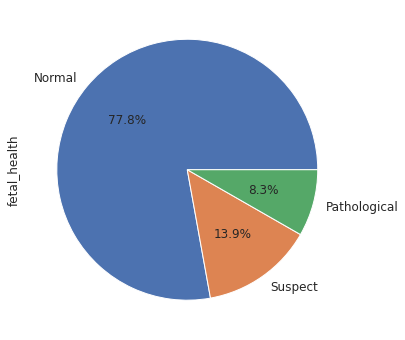

In [86]:
fig = plt.figure(figsize=(10,6))
ax = (dataset['fetal_health'].value_counts()*100.0 /len(dataset)).plot.pie(autopct='%.1f%%', labels = ['Normal', 'Suspect','Pathological'],
         fontsize=12)

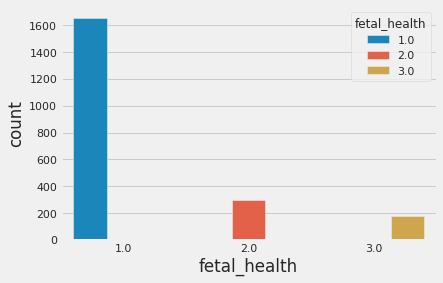

In [87]:
sns.color_palette("Spectral", as_cmap=True)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fetal_health', data=dataset, hue='fetal_health')

In [88]:
x = dataset.iloc[:,:-1]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range

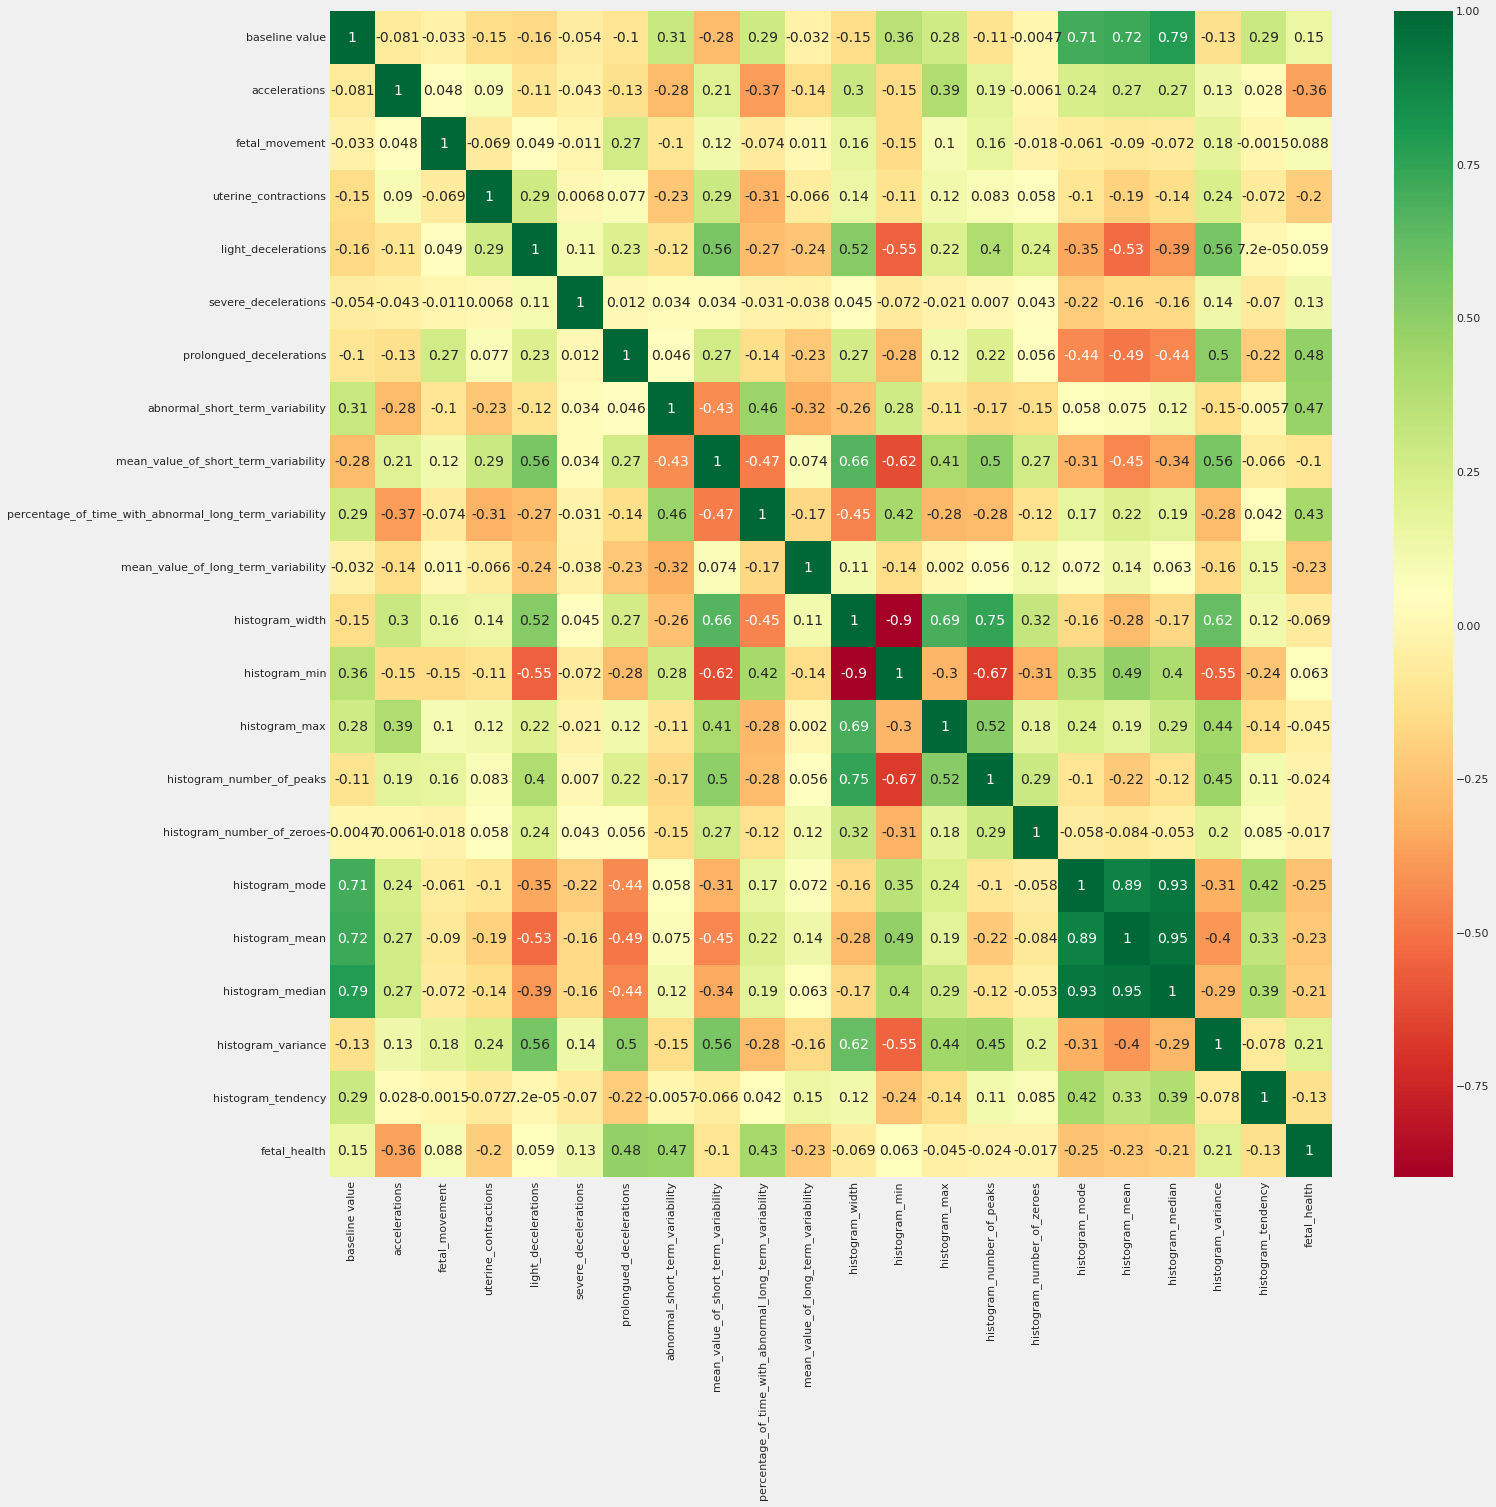

In [89]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

(0, 22)

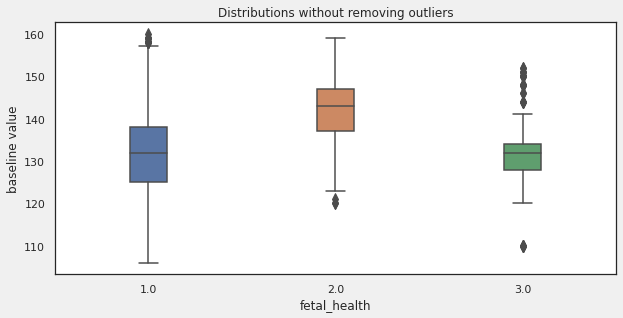

In [90]:
fig = plt.figure(figsize=(12,10))
sns.set(style="white")
rect1 = [0.10, 0.55, 0.65, 0.35] 
rect2 = [0.10, 0.10, 0.65, 0.35]
ax1 = plt.axes(rect1)
sns.boxplot(x=dataset["fetal_health"], y=dataset["baseline value"],width=0.2,data=dataset,fliersize=8)
plt.title('Distributions without removing outliers')
dataset[dataset['baseline value']>160].shape

Text(0.5, 1.0, 'Distributions after removing outliers')

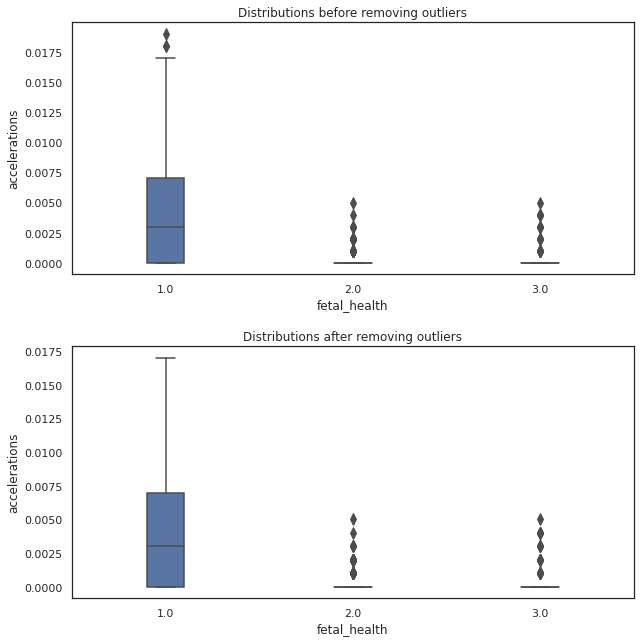

In [91]:
fig = plt.figure(figsize=(12,10))
sns.set(style="white")
rect1 = [0.10, 0.55, 0.65, 0.35]
rect2 = [0.10, 0.10, 0.65, 0.35]
ax1 = plt.axes(rect1)
sns.boxplot(x=dataset["fetal_health"], y=dataset["accelerations"],width=0.2,data=dataset,fliersize=8)
plt.title('Distributions before removing outliers')
dataset[dataset['accelerations']>0.0175].shape
df=dataset[dataset['accelerations']<0.0175]
ax2 = plt.axes(rect2)
sns.boxplot(x=df["fetal_health"], y=df["accelerations"],width=0.2,data=df,fliersize=8)
plt.title('Distributions after removing outliers')

Text(0.5, 1.0, 'Distributions after removing outliers')

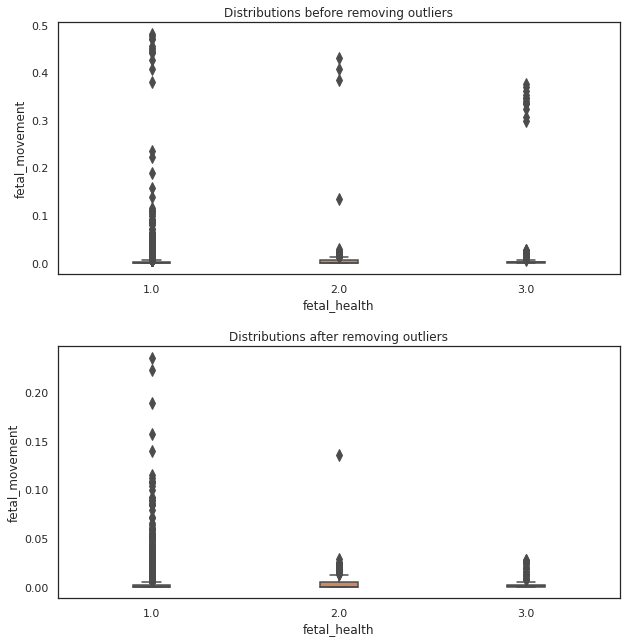

In [92]:
fig = plt.figure(figsize=(12,10))
sns.set(style="white")
rect1 = [0.10, 0.55, 0.65, 0.35] 
rect2 = [0.10, 0.10, 0.65, 0.35]
ax1 = plt.axes(rect1)
sns.boxplot(x=dataset["fetal_health"], y=dataset["fetal_movement"],width=0.2,data=dataset,fliersize=8)
plt.title('Distributions before removing outliers')
df[df['fetal_movement']>float(1000/3600)].shape
df=dataset[dataset['fetal_movement']<float(1000/3600)]
ax2 = plt.axes(rect2)
sns.boxplot(x=df["fetal_health"], y=df["fetal_movement"],width=0.2,data=dataset,fliersize=8)
plt.title('Distributions after removing outliers')

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# FEATURE SELECTION
# DEFINING A FUNCTION TO IDENTIFY FEATURES BASED ON THEIR CORRELATION
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_features = correlation(X_train, 0.8)  # here, correlation coefficient is chosen to be 0.8
print(corr_features)

X_train = X_train.drop(corr_features, axis=1)  # dropping the features that satisfied the criteria
X_test = X_test.drop(corr_features, axis=1)  # dropping the features that satisfied the criteria

c = list(X_train.columns.unique())
print(*c, sep='\n ')  # printing the remaining features

{'histogram_median', 'histogram_mean', 'histogram_min'}
baseline value
 accelerations
 fetal_movement
 uterine_contractions
 light_decelerations
 severe_decelerations
 prolongued_decelerations
 abnormal_short_term_variability
 mean_value_of_short_term_variability
 percentage_of_time_with_abnormal_long_term_variability
 mean_value_of_long_term_variability
 histogram_width
 histogram_max
 histogram_number_of_peaks
 histogram_number_of_zeroes
 histogram_mode
 histogram_variance
 histogram_tendency


In [94]:
print(X_train.shape)

(1700, 18)


In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
print(X_test.shape)

(426, 18)


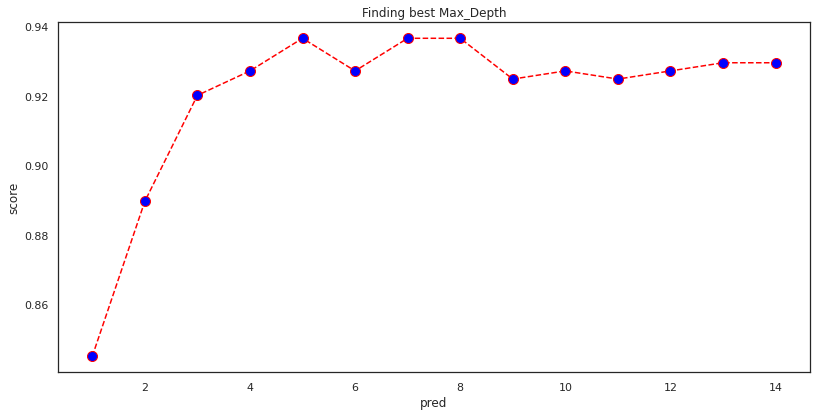

In [96]:
#Finding best max_depth Value

accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth = i, random_state = 42)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(Y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')
plt.show()

Text(0, 0.5, 'Testing Accuracy')

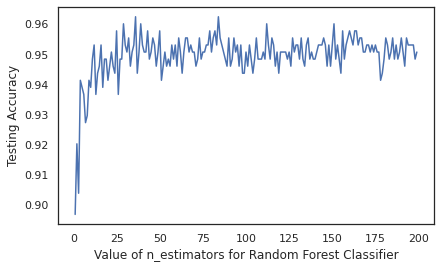

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, Y_train)
    Y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [98]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(max_depth = 8,n_estimators = 125,random_state = 42)
  
# Train the model using the training sets
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=125, random_state=42)

In [99]:

y_pred = clf.predict(X_test)

"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, y_pred)*100))

Accuracy of the Model: 94.83568075117371%


In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[330   3   0]
 [ 16  48   0]
 [  2   1  26]]


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions= clf.predict(X_train)
percentage=clf.score(X_train,Y_train)
res=confusion_matrix(Y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= clf.predict(X_test)
percentage=clf.score(X_test,Y_test)
res=confusion_matrix(Y_test,predictions)
print("validation confusion matrix")
print(res)
print(classification_report(Y_test, predictions))
# check the accuracy on the training set
print('training accuracy = '+str(clf.score(X_train, Y_train)*100))
print('testing accuracy = '+str(clf.score(X_test, Y_test)*100))

Training confusion matrix
[[1320    2    0]
 [  33  198    0]
 [   2    4  141]]
validation confusion matrix
[[330   3   0]
 [ 16  48   0]
 [  2   1  26]]
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       333
         2.0       0.92      0.75      0.83        64
         3.0       1.00      0.90      0.95        29

    accuracy                           0.95       426
   macro avg       0.96      0.88      0.91       426
weighted avg       0.95      0.95      0.95       426

training accuracy = 97.58823529411764
testing accuracy = 94.83568075117371


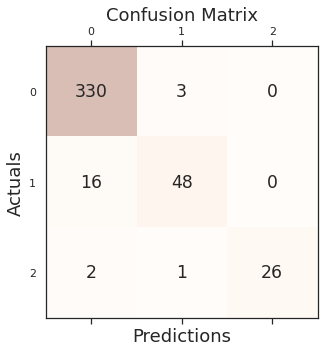

In [102]:

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [113]:
print(X_train.shape)

(1700, 18)


In [ ]:
# Predicting, wheather new customer with Age & Salary will Buy or Not

baseline_value = float(input("Enter Heart Rate: "))
accelerations = float(input("Enter accelerations values: "))
fetal_movement = float(input("Enter fetal_movement: "))
uterine_contractions  = float(input("Enter uterine_contractions: "))
light_decelerations = float(input("Enter light_decelerations: "))
severe_decelerations = float(input("Enter severe_decelerations: "))
prolongued_decelerations = float(input("Enter prolongued_decelerations: "))
abnormal_short_term_variability = float(input("Enter abnormal_short_term_variability: "))
mean_value_of_short_term_variability = float(input("Enter mean_value_of_short_term_variability: "))
percentage_of_time_with_abnormal_long_term_variability = float(input("Enter percentage_of_time_with_abnormal_long_term_variability: "))
mean_value_of_long_term_variability = float(input("Enter mean_value_of_long_term_variability: "))
histogram_width = float(input("Enter histogram_width: "))
histogram_max = float(input("Enter histogram_max: "))
histogram_number_of_peaks = float(input("Enter histogram_number_of_peaks: "))
histogram_number_of_zeroes = float(input("Enter histogram_number_of_zeroes: "))
histogram_mode = float(input("Enter histogram_mode: "))
histogram_variance = float(input("Enter histogram_variance: "))
histogram_tendency = float(input("Enter histogram_tendency: "))

newdata = [[baseline_value,
 accelerations,
 fetal_movement,
 uterine_contractions,
 light_decelerations,
 severe_decelerations,
 prolongued_decelerations,
 abnormal_short_term_variability,
 mean_value_of_short_term_variability,
 percentage_of_time_with_abnormal_long_term_variability,
 mean_value_of_long_term_variability,
 histogram_width,
 histogram_max,
 histogram_number_of_peaks,
 histogram_number_of_zeroes,
 histogram_mode,
 histogram_variance,
 histogram_tendency]]
result = clf.predict(sc.transform(newdata))
print("Result ",result)

if result == 1.0:
  print("Normal")
elif result == 2.0:
  print("Suspect")
else:
  print("Pathological")
  